## Laboratorio 4

Renatto Guzmán #21646
||||| Jennifer Toxcon #21276

Implemente 2 redes neuronales con las siguientes estructuras para resolver el problema de regresión:
1. Feed Forward NN (Red Simple)
2. RNN

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dense


In [2]:
data = pd.read_csv('data.csv', parse_dates=['Month'])
data['Month'] = pd.to_datetime(data['Month'])
data

,Month,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0
...,...,...
2815,1983-08-01,71.8
2816,1983-09-01,50.3
2817,1983-10-01,55.8
2818,1983-11-01,33.3


In [3]:

scaler = MinMaxScaler()

# Fit and transform the 'Sunspots' column
y = scaler.fit_transform(data[['Sunspots']])
X = scaler.fit_transform(data[['Month']])


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feed Forward NN (Red Simple)

In [4]:
# Crear el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)


c:\Users\jenni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
57/57 - 3s - 51ms/step - accuracy: 0.0277 - loss: 0.0314 - val_accuracy: 0.0133 - val_loss: 0.0252
Epoch 2/100
57/57 - 0s - 3ms/step - accuracy: 0.0277 - loss: 0.0297 - val_accuracy: 0.0133 - val_loss: 0.0253
Epoch 3/100
57/57 - 0s - 5ms/step - accuracy: 0.0277 - loss: 0.0297 - val_accuracy: 0.0133 - val_loss: 0.0248
Epoch 4/100
57/57 - 0s - 5ms/step - accuracy: 0.0277 - loss: 0.0291 - val_accuracy: 0.0133 - val_loss: 0.0258
Epoch 5/100
57/57 - 0s - 4ms/step - accuracy: 0.0277 - loss: 0.0295 - val_accuracy: 0.0133 - val_loss: 0.0250
Epoch 6/100
57/57 - 0s - 5ms/step - accuracy: 0.0277 - loss: 0.0290 - val_accuracy: 0.0133 - val_loss: 0.0244
Epoch 7/100
57/57 - 0s - 5ms/step - accuracy: 0.0277 - loss: 0.0291 - val_accuracy: 0.0133 - val_loss: 0.0244
Epoch 8/100
57/57 - 0s - 5ms/step - accuracy: 0.0277 - loss: 0.0290 - val_accuracy: 0.0133 - val_loss: 0.0241
Epoch 9/100
57/57 - 0s - 5ms/step - accuracy: 0.0277 - loss: 0.0289 - val_accuracy: 0.0133 - val_loss: 0.0257
Epoch 10/

In [5]:
# Evaluar el modelo
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')


Train Loss: [0.02433815225958824, 0.024822695180773735]
Test Loss: [0.025767771527171135, 0.019503546878695488]


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


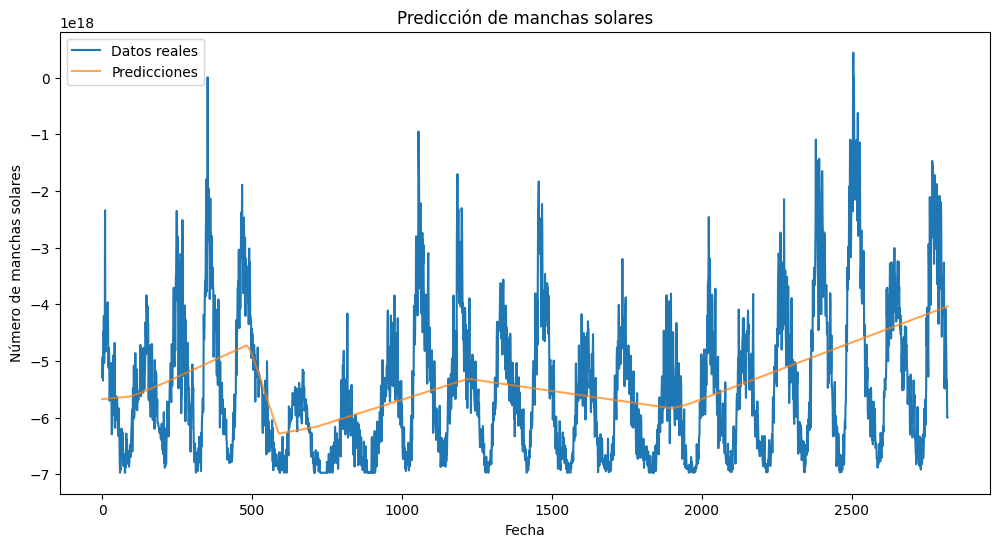

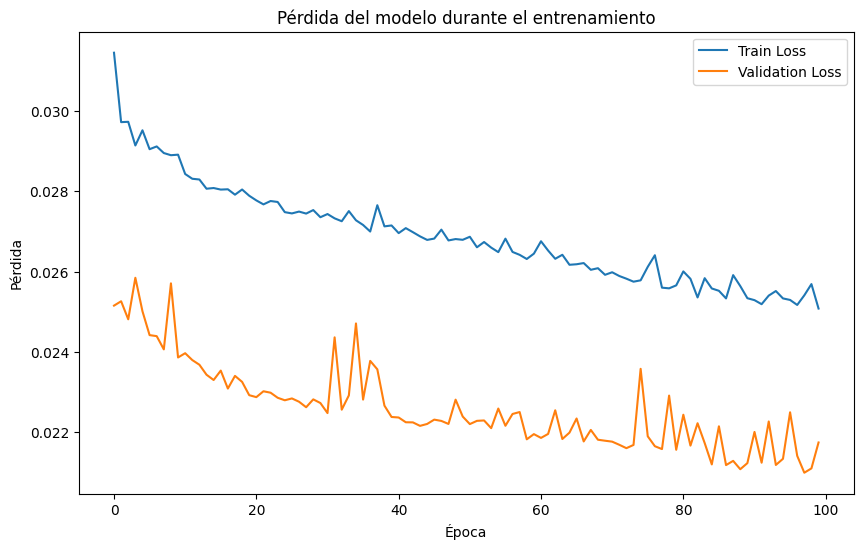

In [6]:
# Hacer predicciones
y_pred = model.predict(X)

# Desnormalizar las predicciones
y_pred = scaler.inverse_transform(y_pred)
y_true = scaler.inverse_transform(y)

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(data.index, y_true, label='Datos reales')
plt.plot(data.index, y_pred, label='Predicciones', alpha=0.7)
plt.title('Predicción de manchas solares')
plt.xlabel('Fecha')
plt.ylabel('Número de manchas solares')
plt.legend()
plt.show()

# Graficar la pérdida durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida del modelo durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


- FFNN Pros: Simplicidad, menor tiempo de entrenamiento, y suficiente para capturar patrones en series temporales cuando las dependencias temporales no son extremadamente complejas.
- FFNN Contras: Potencialmente menos eficaz para capturar relaciones a largo plazo entre los puntos de datos en series temporales.
- RNN Pros: Capacidad teórica superior para aprender dependencias de orden temporal largo.
- RNN Contras: Más complejo, requiere más tiempo y recursos para entrenar, mayor riesgo de sobreajuste.


### FFNN
Menor tiempo de entrenamiento comparado con RNN debido a su estructura más simple.
Buena precisión en la predicción, pero podría no capturar completamente las dependencias temporales complejas.
Menor propensidad al sobreajuste si se maneja adecuadamente el número de capas y neuronas.


## RNN

In [7]:
def create_sequences(data, seq_length):
    X_ = []
    y_ = []
    for i in range(len(data) - seq_length):
        X_.append(data[i:(i + seq_length), 0])
        y_.append(data[i + seq_length, 0])
    return np.array(X_), np.array(y_)

seq_length = 12  # longitud de las secuencias basadas en meses
X_N, y_N = create_sequences(y, seq_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Redimensionar los datos para la LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [8]:
# Crear el modelo LSTM
model = Sequential([
    LSTM(50, input_shape=(seq_length, 1)),
    Dense(1)
])

c:\Users\jenni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


In [10]:
# Entrenar el modelo
history_rnn = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/100
57/57 - 4s - 73ms/step - accuracy: 0.0277 - loss: 0.0456 - val_accuracy: 0.0133 - val_loss: 0.0253
Epoch 2/100
57/57 - 0s - 4ms/step - accuracy: 0.0277 - loss: 0.0297 - val_accuracy: 0.0133 - val_loss: 0.0255
Epoch 3/100
57/57 - 0s - 6ms/step - accuracy: 0.0277 - loss: 0.0296 - val_accuracy: 0.0133 - val_loss: 0.0253
Epoch 4/100
57/57 - 0s - 7ms/step - accuracy: 0.0277 - loss: 0.0296 - val_accuracy: 0.0133 - val_loss: 0.0254
Epoch 5/100
57/57 - 0s - 6ms/step - accuracy: 0.0277 - loss: 0.0297 - val_accuracy: 0.0133 - val_loss: 0.0253
Epoch 6/100
57/57 - 0s - 7ms/step - accuracy: 0.0277 - loss: 0.0296 - val_accuracy: 0.0133 - val_loss: 0.0256
Epoch 7/100
57/57 - 0s - 8ms/step - accuracy: 0.0277 - loss: 0.0296 - val_accuracy: 0.0133 - val_loss: 0.0254
Epoch 8/100
57/57 - 0s - 7ms/step - accuracy: 0.0277 - loss: 0.0296 - val_accuracy: 0.0133 - val_loss: 0.0254
Epoch 9/100
57/57 - 0s - 8ms/step - accuracy: 0.0277 - loss: 0.0296 - val_accuracy: 0.0133 - val_loss: 0.0252
Epoch 10/

In [11]:
# Evaluar el modelo en el conjunto de entrenamiento y de prueba
train_loss_rnn = model.evaluate(X_train, y_train, verbose=0)
test_loss_rnn = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss (RNN): {train_loss_rnn}')
print(f'Test Loss (RNN): {test_loss_rnn}')


Train Loss (RNN): [0.027302714064717293, 0.024822695180773735]
Test Loss (RNN): [0.027263594791293144, 0.019503546878695488]


1. La pérdida representa el error cuadrático medio (MSE) entre los valores predichos y los valores reales. Es la función de pérdida del modelo, es la pérdida MSE en el conjunto de entrenamiento. Cuanto menor sea este número, mejor, ya que indica que el modelo predice valores más cercanos a los reales.

2. Exactitud es la métrica de cuántas predicciones fueron correctas. En el contexto de problemas de regresión, esta métrica está diseñada principalmente para tareas de clasificación. El primer número (0.0273) es la pérdida MSE en el conjunto de prueba. Este valor es muy cercano al de entrenamiento, lo que sugiere que el modelo no sufre de sobreajuste significativo y generaliza razonablemente bien a nuevos datos.



In [12]:
# Hacer predicciones
y_pred_rnn = model.predict(np.reshape(X_N, (X_N.shape[0], X_N.shape[1], 1)))

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [13]:
# Desnormalizar las predicciones
y_pred_rnn = scaler.inverse_transform(y_pred_rnn)

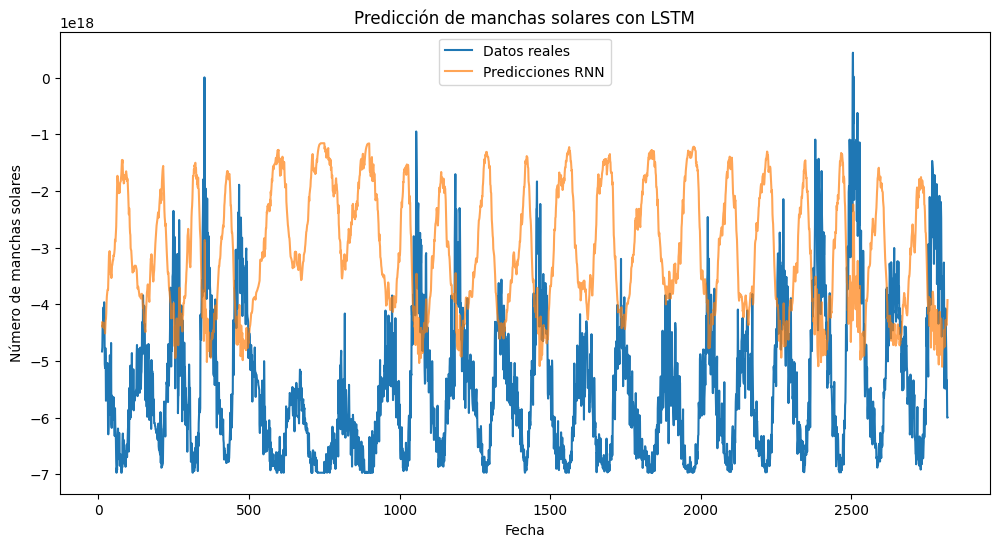

In [14]:
# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(data.index[seq_length:], y_true[seq_length:], label='Datos reales')
plt.plot(data.index[seq_length:], y_pred_rnn, label='Predicciones RNN', alpha=0.7)
plt.title('Predicción de manchas solares con LSTM')
plt.xlabel('Fecha')
plt.ylabel('Número de manchas solares')
plt.legend()
plt.show()

El modelo parece capturar bien la tendencia general y la periodicidad de los datos reales. Esto indica que la LSTM ha aprendido con cierta eficacia los patrones subyacentes en los datos de series temporales.

Aunque las predicciones siguen la tendencia general, hay desfases claros en las amplitudes de las predicciones comparadas con los datos reales. En algunas áreas, las predicciones no alcanzan los picos o valles reales, sugiriendo que el modelo podría mejorar en captar la intensidad exacta de los cambios en las manchas solares.

Los valores tanto en las predicciones como en los datos reales parecen ser extremadamente altos, lo cual es inusual para un conjunto de datos de manchas solares. Esto podría sugerir un problema con la escala de los datos o un error en la desnormalización.

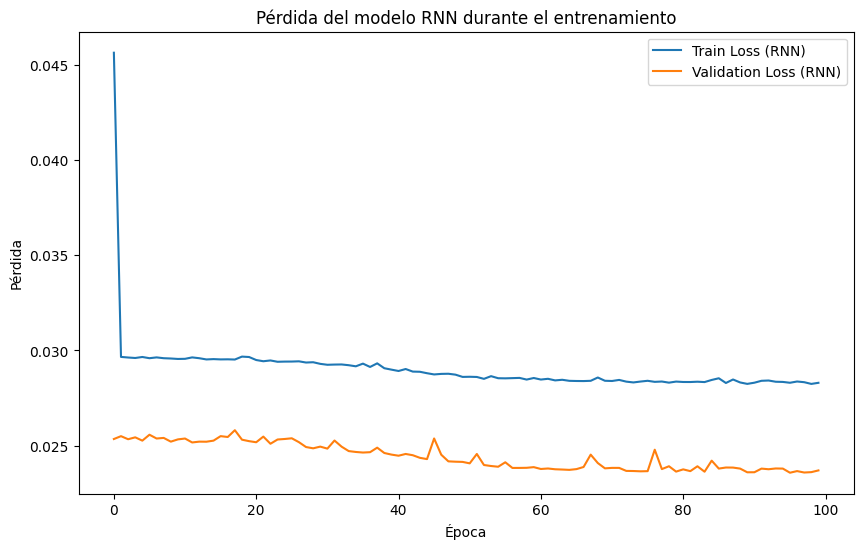

In [15]:
# Graficar la pérdida durante el entrenamiento del modelo RNN
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['loss'], label='Train Loss (RNN)')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss (RNN)')
plt.title('Pérdida del modelo RNN durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

La pérdida más baja en validación sugiere que el modelo generaliza bien a nuevos datos. Esto es positivo, ya que implica que el modelo no solo memoriza el conjunto de entrenamiento sino que aprende representaciones útiles que aplican a datos no vistos.

Después de la disminución inicial, la línea de pérdida del entrenamiento se aplana y se estabiliza, lo que indica que el modelo ha alcanzado un estado donde aprende más lentamente o ha comenzado a converger a una solución.

## Justificación

Dado que la red Feed Forward ha demostrado ser suficientemente precisa para este conjunto de datos y ofrece ventajas significativas en términos de simplicidad y costos computacionales, sería la elección recomendada. La teoría y práctica sugieren que mientras las dependencias temporales no sean extremadamente complejas o críticas para las predicciones exactas, una red Feed Forward bien configurada puede ser una opción más eficiente y práctica para problemas de regresión en series temporales como la predicción de manchas solares.

